<a href="https://colab.research.google.com/github/Peter-Apps/Participant-Notebooks/blob/main/Eardley_Bigfoot_sightings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teacher Implementation Plan

I plan to use this as an into to coding activity for my physics honors classes, which are comprised of 10th-12th grade suburban students with little to no coding experience.

This is a work in progress and I haven't finished the student walkthrough. The idea is to introduce necessary python skills while using a data set that is fun. I know I was overwhelmed with the coding and the data set that I wasn't very familiar with. I decided to have a fun activity that's kind of open ended. When it is complete, I want to give students the option of filtering out the data they want to look at. This way they have an introduction to the coding before they are overwhelmed with physics data they're also unfamiliar with.

I plan to work on this in the first weeks of class. That way about a month later, they can use their new skills to quickly analyze freefall and projectile motion data we gather throwing things off the balcony.

# Intro to Coding and Data Manipulation
We're going to work on a brief activity to help us learn some coding that's useful for data manipulation. Before we add in unfamiliar science, let's analyze some fun data.

By the end of this activity you should be able to:


*   Import python packages to help manipulate data
*   Import csv files full of data from the internet
*   Learn to filter large sets of data
*   Plot interesting data as a scatter plot
*   Do simple math functions in python
*   Learn to ALWAYS LABEL AXES and GRAPHS
*   Critically think and come up with other factors that may affect a data set

Let's get started.

Each block is different functions we need to accomplish our goals. Anything in green that follows a # isn't read by the computer. These are comments to help humans understand what that line of code is doing. Click the play sign to run the line of code. Some of the code is written incorrectly. Some has info you need to change. Look for comments to help!



In [8]:
# imports some software packages we'll use. Nothing here needs to be changed. Hit the play button!
import pandas as pd # Pandas works with python to help us wrangle data. It can sort, clean, and read our csv files. csv files are how we input data
import numpy as np # Numpy handles the math!
import matplotlib as mpl
import matplotlib.pyplot as plt # Both of these help us make pretty graphs
!pip install geopandas
import geopandas as gpd # Geopandas helps us with geospatial data. We're using data with latitudes and longitudes... So we might need a map.
!pip install  geodatasets
import geodatasets

**Fun Fact: A lot of coding is copy and paste! No need to reinvent the wheel. You can copy code and then change it to fit your needs!**

# Data Acquisition

Now that we've got all the tools we need, let's add some data! I found a csv file of BigFoot sightings in the US. Let's load that from here: https://query.data.world/s/sylnn5qhouzbjc37lh2ltteha5ubjn

Copy and paste that link in the parentheses below.

In [9]:
# Loads the csv file of BigFoot sightings
BigFoot = pd.read_csv('https://query.data.world/s/sylnn5qhouzbjc37lh2ltteha5ubjn')
BigFoot.head() # This will display the data on our screen so we can take a look. What kind of information do we have to work with?

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_intensity,precip_probability,precip_type,pressure,summary,conditions,uv_index,visibility,wind_bearing,wind_speed
0,I am not sure how relevant this report will be...,"We were on our way to Rapid City, so we were h...",Washakie County,Wyoming,Summer,NaN,NaN,NaN,NaN,798.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I don't know if what I saw was two bigfoots or...,"Heading to the deep mine Poca #2, the airshaft...",Wyoming County,West Virginia,Winter,Report 13237: Daylight sighting near an abando...,37.58135,-81.29745,2005-12-03,13237.0,...,0.204,100.0,"['rain', 'snow']",1018.7,Partly cloudy throughout the day with late aft...,"Snow, Rain, Partially cloudy",NaN,9.3,168.1,17.1
2,"My family and I went to Ludlow, Vermont for Co...",It's off Rt 100 outside of Ludlow Vermont. It ...,Windsor County,Vermont,Fall,Report 13285: Evening sighting by motorists on...,43.46540,-72.70510,2005-10-08,13285.0,...,3.208,100.0,['rain'],1011.8,Cloudy skies throughout the day with a chance ...,"Rain, Overcast",NaN,5.0,356.2,7.6
3,It was spring break 1984 and I was 16 at the t...,"Wythe county Virginia near Wytheville, looking...",Wythe County,Virginia,Spring,"Report 2285: Boy sees ""Bigfoot"" in the woods w...",37.22647,-81.09017,1984-04-08,2285.0,...,0.000,0.0,NaN,1020.9,Partly cloudy throughout the day.,Partially cloudy,NaN,13.0,107.3,11.5
4,It was the winter of 1996 and we were on our w...,"Hwy 182, Wood County Between Quitman, Texas an...",Wood County,Texas,Winter,Report 2048: Night time road crossing observation,32.79430,-95.54250,1996-12-22,2048.0,...,NaN,0.0,NaN,NaN,Partly cloudy throughout the day.,Partially cloudy,NaN,10.5,180.4,20.8


# It Worked!
 **Cool! Our file loaded. Any time we want to use this data, we just need to use the name we defined "BigFoot".**

 **The bottom of our chart says we have 28 different columns. And only 5 rows... It doesn't make sense for us to use a csv and python for only 5 different events. I bet there's more. Let's use the .shape command to find out how many rows and columns we have!**

In [10]:
BigFoot.shape # The .shape command tells us how many rows and columns our data file has

(5082, 29)

# Uh Oh...

**Why didn't that work? You can figure it out... Read the error. It'll give you a hint. Fix the problem and run it again.**

**Now that it worked, how many columns do we have? How many rows?**

**You should see** (5021, 28) **printed. Take a look at the columns. Let's learn how to trim this data a little.**

**Let's focus on simple data analysis for now. The descriptions of the sightings are cool... But those are difficult/impossible to graph. Anything we trim will just be what WE CURRENTLY view... We won't be permanently changing the csv file. So, let's focus on a couple different pieces of this data for now. Let's plan to plot some sightings based on season and moon phase.**

**We're going to use the .drop function to drop some of this info from our view. Remember we're not changing the actual file... Just our current view. We'll start by naming this new chart. Let's call it Trimmed for a name.**

In [11]:
#This is going to drop all the columns from our view that I've named here. Let's display it too. We might want to drop more.
Trimmed = BigFoot.drop(columns = ['observed', 'location_details', 'county', 'title', 'number', 'date', 'classification', 'geohash'])
Trimmed.head()


,state,season,latitude,longitude,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,...,precip_intensity,precip_probability,precip_type,pressure,summary,conditions,uv_index,visibility,wind_bearing,wind_speed
0,Wyoming,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West Virginia,Winter,37.58135,-81.29745,37.8,29.5,21.6,17.5,61.7,66.7,...,0.204,100.0,"['rain', 'snow']",1018.7,Partly cloudy throughout the day with late aft...,"Snow, Rain, Partially cloudy",NaN,9.3,168.1,17.1
2,Vermont,Fall,43.46540,-72.70510,64.3,51.9,45.9,49.3,90.6,100.0,...,3.208,100.0,['rain'],1011.8,Cloudy skies throughout the day with a chance ...,"Rain, Overcast",NaN,5.0,356.2,7.6
3,Virginia,Spring,37.22647,-81.09017,59.0,47.8,37.0,28.1,49.2,76.2,...,0.000,0.0,NaN,1020.9,Partly cloudy throughout the day.,Partially cloudy,NaN,13.0,107.3,11.5
4,Texas,Winter,32.79430,-95.54250,75.3,71.4,68.1,58.6,64.7,52.9,...,NaN,0.0,NaN,NaN,Partly cloudy throughout the day.,Partially cloudy,NaN,10.5,180.4,20.8


**That's a little better... but we still have more to trim. Go back to the previous line of code. Keep adding column names, using the same format. Be careful that they are spelled exactly as they are in the chart. Don't forget to be careful with commas and spacing. Once you're done, rerun the line!**

In [17]:
data_trimmed_1 = BigFoot.query('moon_phase > 0.95')#Trims the data to Full Moon sightings
data_trimmed_1.head() #This displays the filtered data.

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_intensity,precip_probability,precip_type,pressure,summary,conditions,uv_index,visibility,wind_bearing,wind_speed
13,This may not even be relevant now because it h...,NaN,Washington County,Ohio,Summer,Report 3180: Early evening sighting by two chi...,39.40877,-81.73172,1978-07-04,3180.0,...,0.000,0.0,NaN,1014.2,Cloudy skies throughout the day.,Overcast,NaN,3.6,348.9,11.2
23,I heard a series of screams/howls that are not...,The location is in the north eastern part of M...,Wilson County,Tennessee,Fall,Report 24799: Hunter hears loud uknown vocaliz...,35.99780,-86.20110,2008-10-27,24799.0,...,0.000,0.0,NaN,1025.9,Becoming cloudy in the afternoon.,Partially cloudy,NaN,9.9,281.7,20.8
72,"I cannot say for sure what this may have been,...",Location withheld per witness's request.,Orleans County,New York,Spring,Report 11089: Two young boys experience powerf...,43.26886,-78.28014,1992-05-01,11089.0,...,0.075,100.0,['rain'],1015.8,Cloudy skies throughout the day with rain.,"Rain, Overcast",NaN,12.2,102.3,12.0
75,During bow season I and my brother were huntin...,It was on Public Hunting grounds. In the swamp...,Ontario County,New York,Fall,Report 68896: Two hunters hear definite sasqua...,42.67993,-77.29334,2020-10-15,68896.0,...,0.118,100.0,['rain'],1009.8,Becoming cloudy in the afternoon with late aft...,"Rain, Partially cloudy",1.0,9.7,217.4,16.6
106,This was recorded very soon after it happened ...,(exact location withheld by request),Warren County,New York,Spring,Report 15565: Possible vocalizaitons heard app...,43.66780,-73.51238,2002-05-11,15565.0,...,NaN,0.0,NaN,1027.4,Clear conditions throughout the day.,Clear,NaN,9.9,318.8,23.4


In [6]:
#Let's filter again. How many summer sightings are there?
data_trimmed_2 = BigFoot.query('season == "Summer"') # Why does this filter look different than the last?


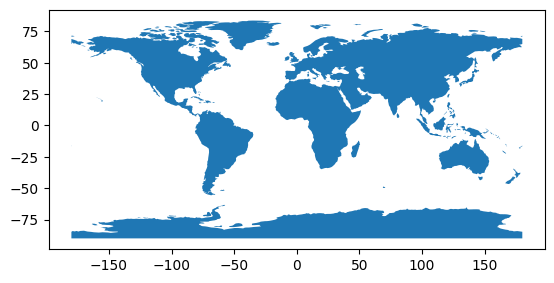

In [13]:
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
world.plot();

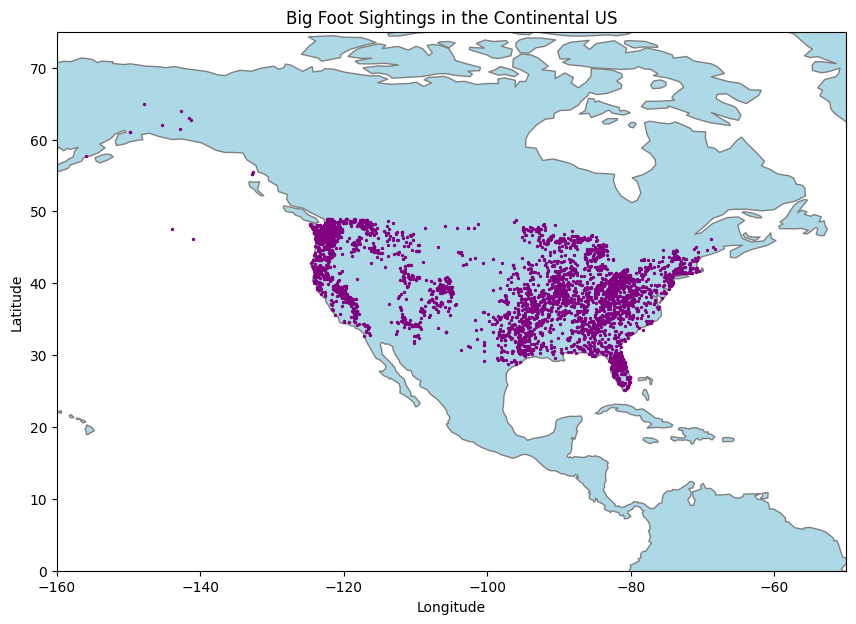

In [14]:
# Let's plot these sightings on a map!
fig, ax = plt.subplots(figsize=(12,7))
x = BigFoot['longitude'] # Pulls the x-coordinate from data (x on maps is longitude)
y = BigFoot['latitude'] # Pulls the y-coordinate from data (y on maps is latitude)
world.plot(ax=ax, color='lightblue', edgecolor='grey')     # this part is the map
ax.scatter(x,y, s=2, color='purple')    # this adds the scatter points on top (you can change the color!)
# What do we think the next three lines do?
ax.set_title('Big Foot Sightings in the Continental US')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-160, -50)    # This zooms into the long. coordinates for the continental US
ax.set_ylim(0, 75)        # This zooms into the lat. coordinates for the continental US
plt.show()


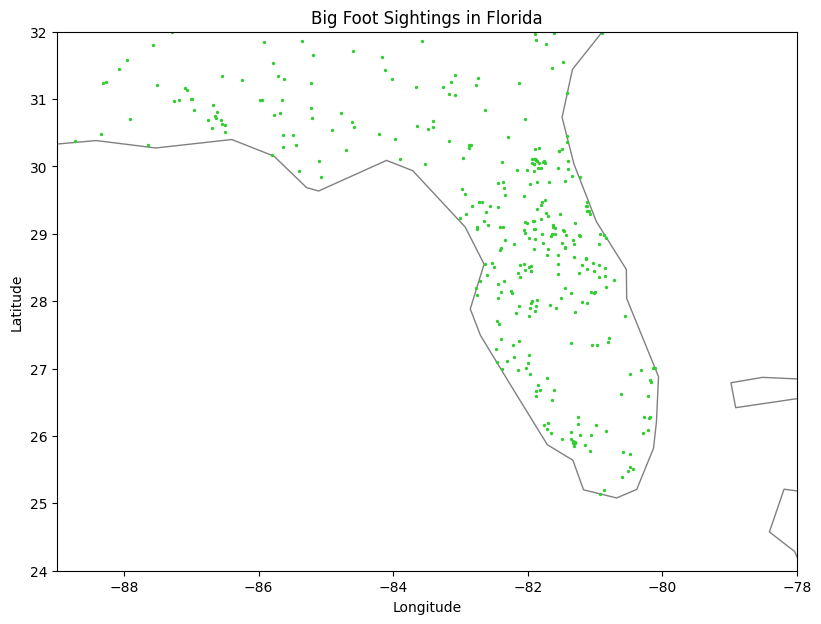

In [15]:
# Let's plot some data for just Florida.
fig, ax = plt.subplots(figsize=(12,7))
x = BigFoot['longitude']
y = BigFoot['latitude']
world.plot(ax=ax, color='white', edgecolor='grey')     # this part is the map
ax.scatter(x,y, s=2, color='limegreen')    # this adds the scatter points on top
ax.set_title('Big Foot Sightings in Florida')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-89, -78)
ax.set_ylim(24, 32)
plt.show() # What would've happened if I filtered for Florida sightings and didn't add this chunk of zoomed in code?

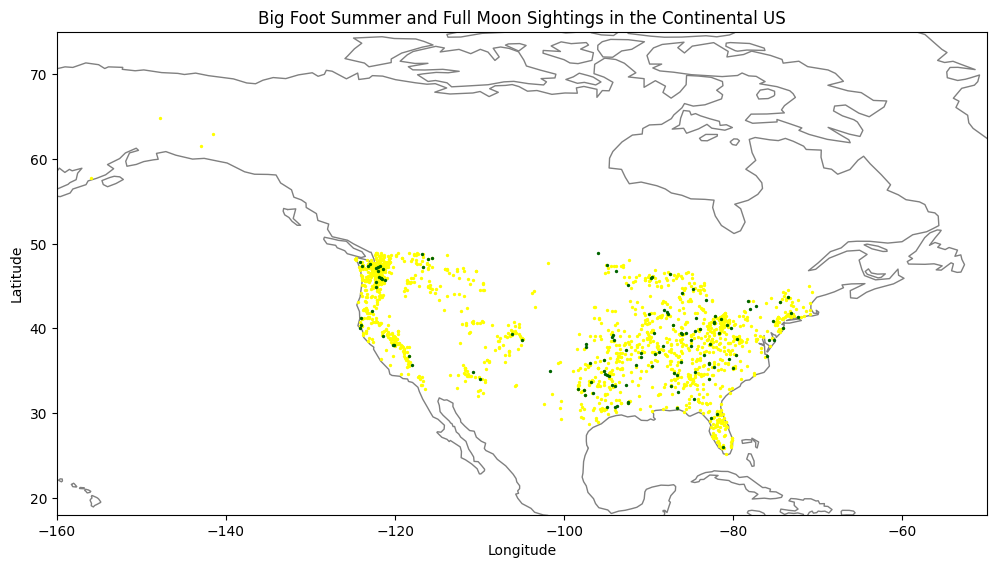

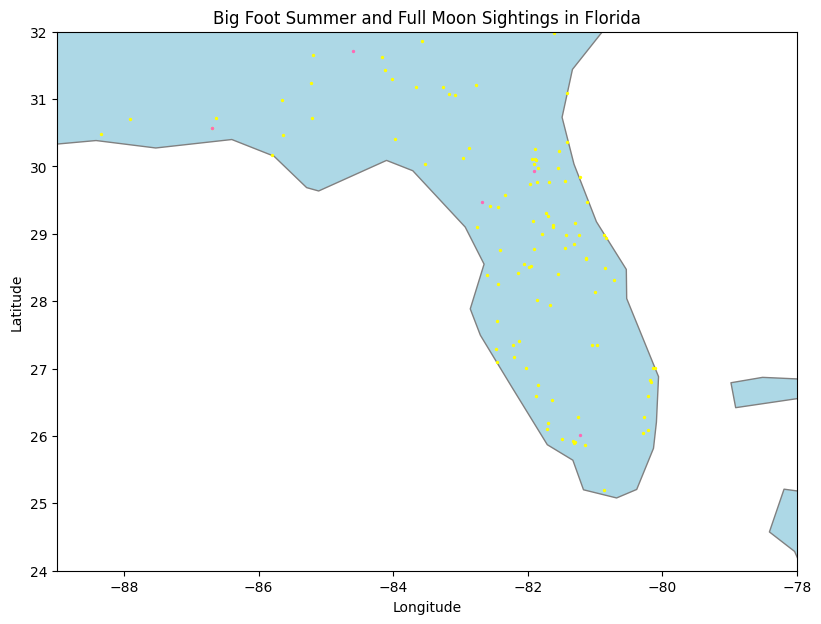

In [18]:
# What would we need to change to use filtered data?
# Is there a way to overylay TWO sets of filtered data?
fig, ax = plt.subplots(figsize=(12,7))
x1 = data_trimmed_1['longitude']
y1 = data_trimmed_1['latitude']
x2 = data_trimmed_2['longitude']
y2 = data_trimmed_2['latitude']
world.plot(ax=ax, color='white', edgecolor='grey')     # this part is the map
ax.scatter(x2,y2, s=2, color='yellow')
ax.scatter(x1,y1, s=2, color='darkgreen')    # this adds the scatter points on top
ax.set_title('Big Foot Summer and Full Moon Sightings in the Continental US')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-160, -50)
ax.set_ylim(18, 75)
plt.show()

fig, ax = plt.subplots(figsize=(12,7))
x1 = data_trimmed_1['longitude']
y1 = data_trimmed_1['latitude']
x2 = data_trimmed_2['longitude']
y2 = data_trimmed_2['latitude']
world.plot(ax=ax, color='lightblue', edgecolor='grey')     # this part is the map
ax.scatter(x2,y2, s=2, color='yellow')
ax.scatter(x1,y1, s=2, color='hotpink')    # this adds the scatter points on top
ax.set_title('Big Foot Summer and Full Moon Sightings in Florida')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-89, -78)
ax.set_ylim(24, 32)
plt.show()

In [39]:
# Let's look at another data set to see if there are any relevant comparisons! UFOs??
import kagglehub

# Download latest version
path = kagglehub.dataset_download("NUFORC/ufo-sightings")

data3 = pd.read_csv(f'{path}/scrubbed.csv')
data3['latitude'] = pd.to_numeric(data3['latitude'], errors='coerce')

/tmp/ipython-input-39-3326877466.py:7: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv(f'{path}/scrubbed.csv')


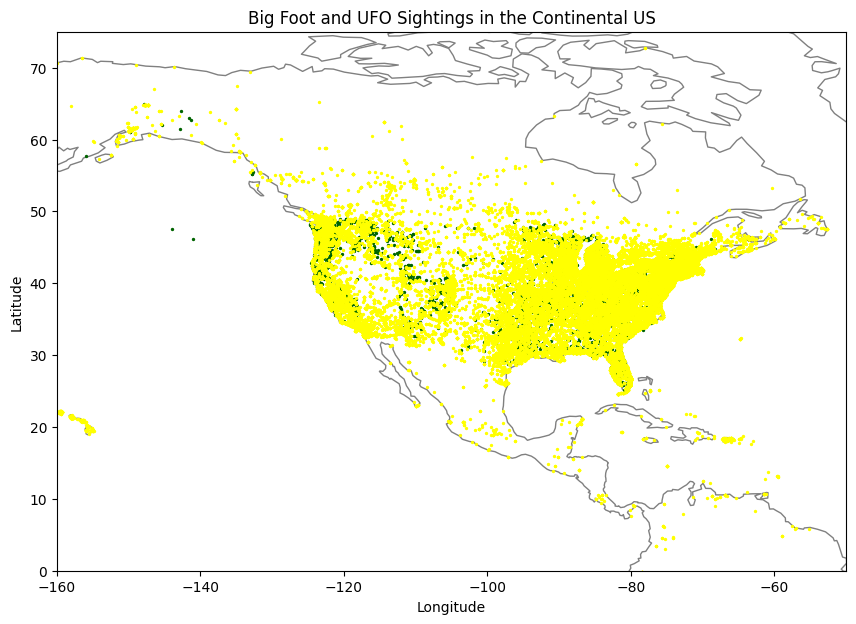

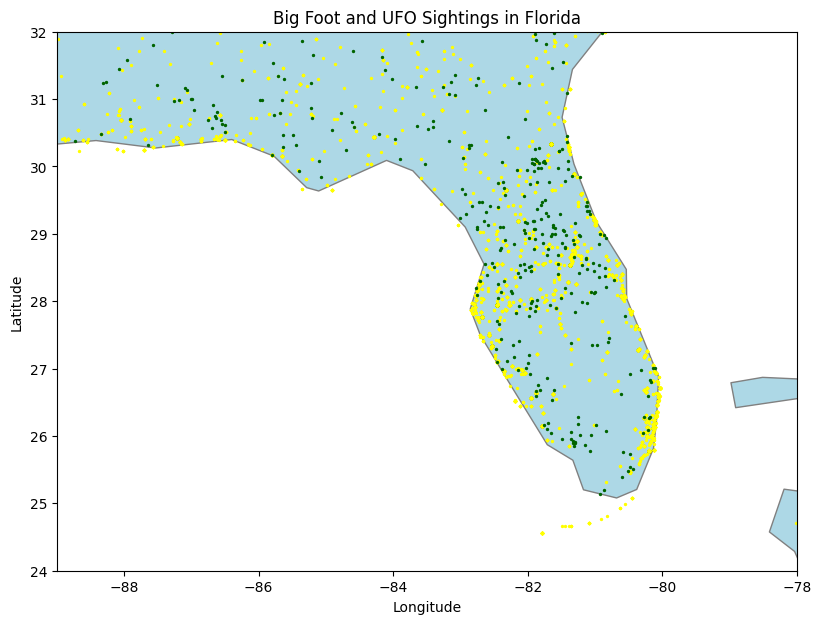

In [41]:
fig, ax = plt.subplots(figsize=(12,7))
x1 = BigFoot['longitude']
y1 = BigFoot['latitude']
x2 = data3['longitude '] # <-- This column has an extra space after it which is annoying
y2 = data3['latitude']
world.plot(ax=ax, color='white', edgecolor='grey')     # this part is the map

ax.scatter(x1,y1, s=2, color='darkgreen')
ax.scatter(x2,y2, s=2, color='yellow')

   # this adds the scatter points on top
ax.set_title('Big Foot and UFO Sightings in the Continental US')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-160, -50)
ax.set_ylim(0, 75)
plt.show()


fig, ax = plt.subplots(figsize=(12,7))
x1 = BigFoot['longitude']
y1 = BigFoot['latitude']
x2 = data3['longitude ']
y2 = data3['latitude']
world.plot(ax=ax, color='lightblue', edgecolor='grey')     # this part is the map
ax.scatter(x2,y2, s=2, color='yellow')
ax.scatter(x1,y1, s=2, color='darkgreen')   # this adds the scatter points on top
ax.set_title('Big Foot and UFO Sightings in Florida')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-89, -78)
ax.set_ylim(24, 32)
plt.show()


In [42]:
AllMoon = BigFoot.fillna(0) # This line fills in a 0 for any missing data. This will make it easy to filter out incomplete data


In [43]:
WithMoonData = AllMoon.query('moon_phase != 0') # Now, let's filter out the rows with no moon phase reported.
WithMoonData.shape # This will tell us how many rows are left, now that we've filtered out the sightings with no reported moon phase

(3972, 29)

In [44]:
NewMoon = AllMoon.query('moon_phase > 0 & moon_phase <.15')


In [45]:
NewMoon.shape

(539, 29)

In [46]:
(509/3391)*100

15.01032143910351

In [57]:
data3.shape

(80332, 11)

In [48]:
CrescentMoon1 = BigFoot.query('moon_phase > .15 & moon_phase <.30 ')
CrescentMoon1.shape

(537, 29)

In [49]:
CrescentMoon2 = BigFoot.query('moon_phase > .55 & moon_phase <.95')
CrescentMoon2.shape


(1572, 29)

In [50]:
448+1300

1748

In [51]:
(1748/3391)*100

51.548215865526394

In [52]:
QuarterMoon = BigFoot.query('moon_phase >.45  & moon_phase <.55')
QuarterMoon.shape

(392, 29)

In [53]:
(311/3391)*100

9.171335889118254

In [54]:
FullMoon = BigFoot.query('moon_phase >.95 & moon_phase < 1.1') # Filters Full Moon sightings
FullMoon.shape

(130, 29)

In [55]:
(161/3391)*100 # Calculates Full Moon Percentage of total sightings

4.7478619876142725

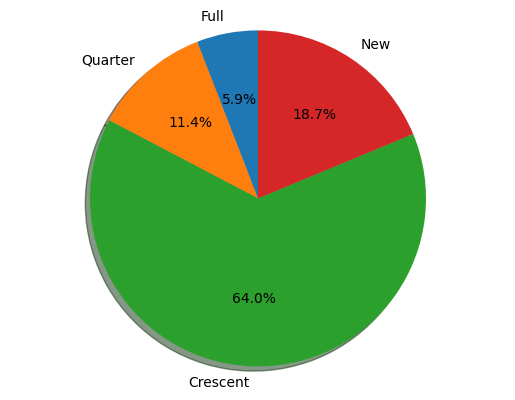

In [56]:
# Creates a pie chart of all sightings and type of moon. Does BigFoot only come out during certain times of the lunar cycle?
labels = 'Full', 'Quarter', 'Crescent', 'New'
sizes = [4.75, 9.2, 51.55, 15.1]
explode = (0, 0, 0, 0)  # No pie pieces are offset

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()